In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data=pd.read_csv(r"C:\Users\Mohammed Zaid\Downloads\tested.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
print("Dataset Overview")
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe(include='all'))

Dataset Overview
Shape: (418, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Summary Statistics:
         PassengerId    Survived      Pclass                      Name   Sex  \
count    418.000000  418.000000  418.000000                       418   418   
unique          NaN         NaN         NaN                       418     2   
top             NaN         NaN         NaN  Peter, Master. Michael J  male   
freq            NaN         NaN         NaN                      

In [4]:
for col in data.select_dtypes(include=[np.number]).columns:
    data[col].fillna(data[col].median(), inplace=True)

C:\Users\Mohammed Zaid\AppData\Local\Temp\ipykernel_2336\1973353913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\Mohammed Zaid\AppData\Local\Temp\ipykernel_2336\1973353913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [5]:
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

C:\Users\Mohammed Zaid\AppData\Local\Temp\ipykernel_2336\4286524817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [6]:
duplicate_count = data.duplicated().sum()
print(f"\n Duplicate rows found: {duplicate_count}")
if duplicate_count > 0:
    data.drop_duplicates(inplace=True)


 Duplicate rows found: 0


In [7]:
num_cols = data.select_dtypes(include=np.number).columns
cat_cols = data.select_dtypes(exclude=np.number).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


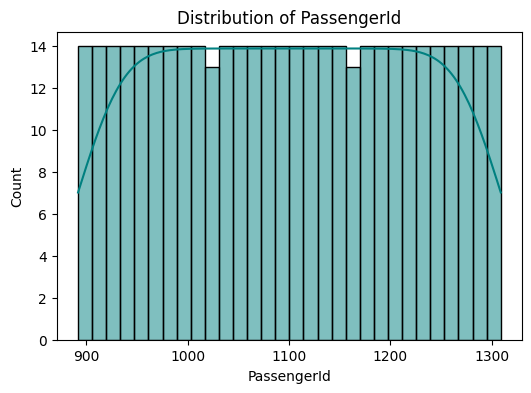

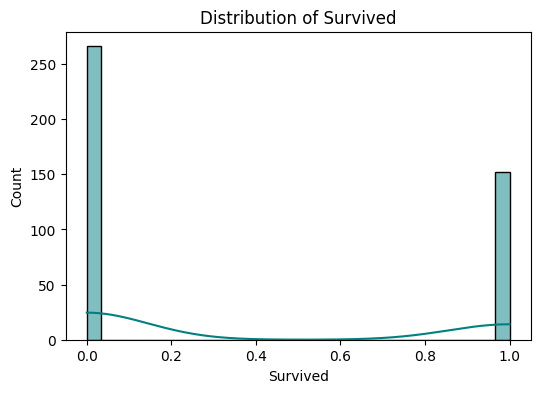

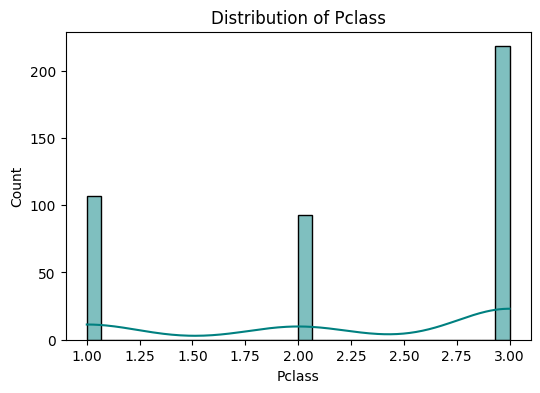

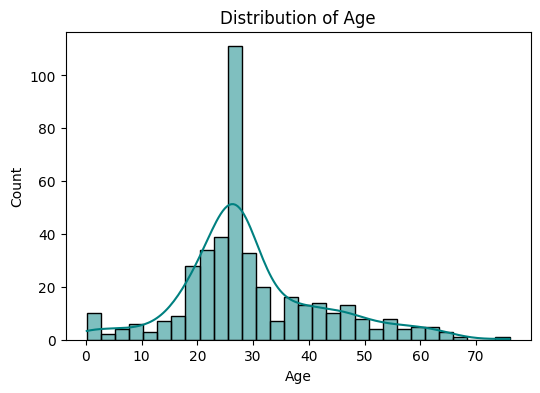

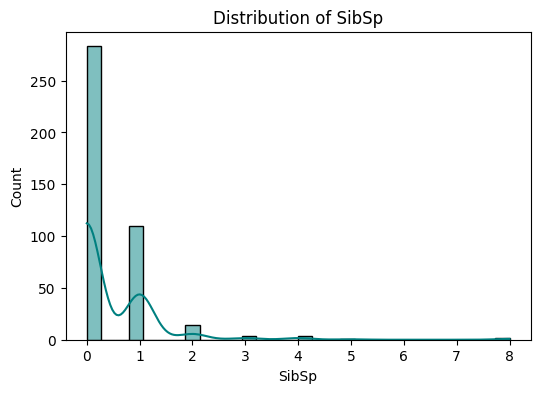

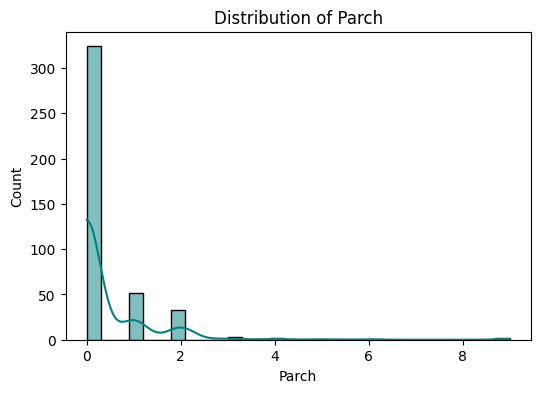

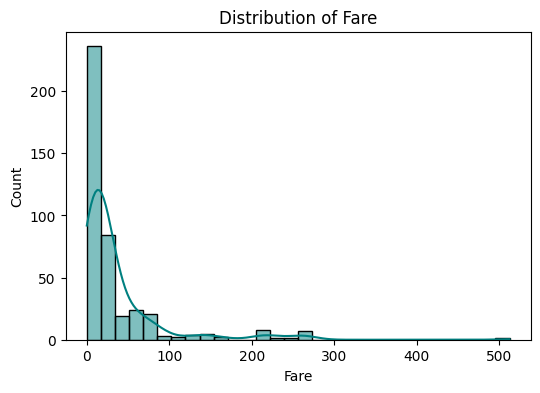

In [8]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()

FEATURE RELATIONSHIPS

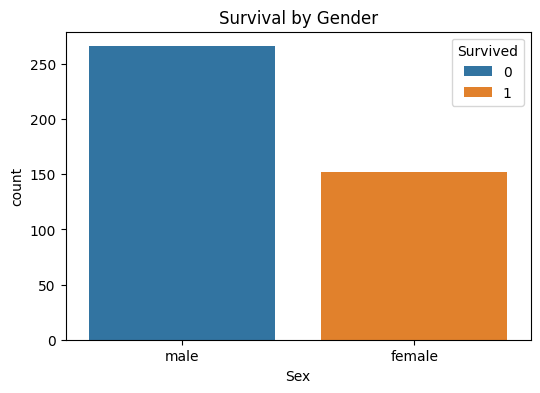

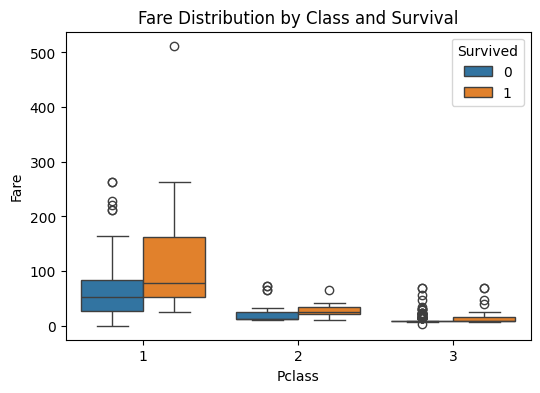

In [9]:
if 'Survived' in data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Sex', hue='Survived', data=data)
    plt.title("Survival by Gender")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data)
    plt.title("Fare Distribution by Class and Survival")
    plt.show()

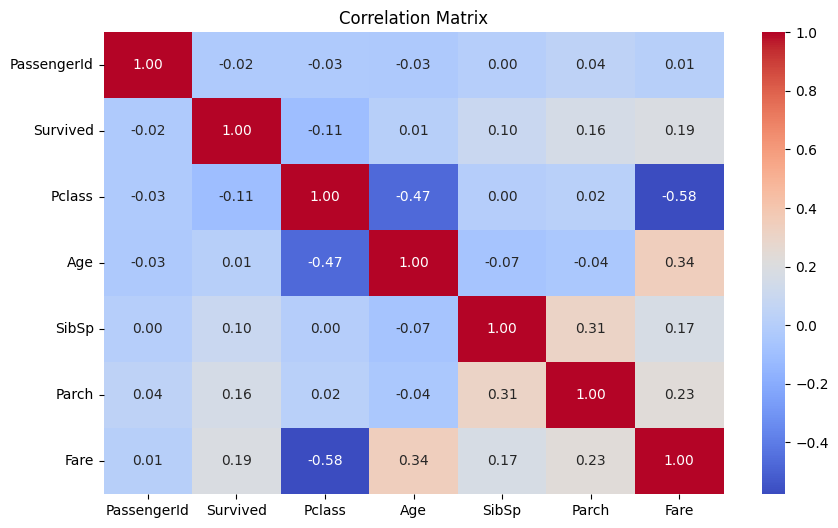

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

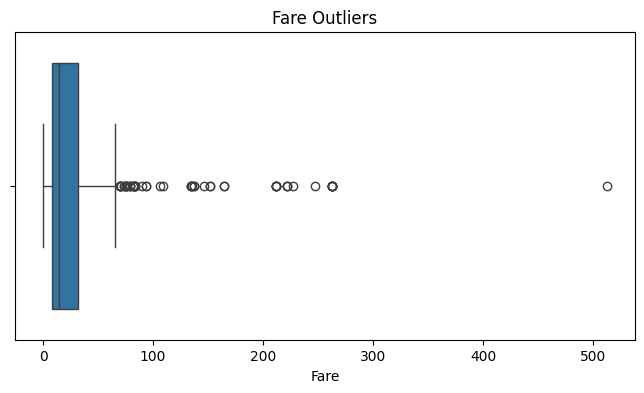


 Number of Fare Outliers: 18


In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(x=data['Fare'])
plt.title("Fare Outliers")
plt.show()

z_scores = np.abs(stats.zscore(data['Fare']))
outliers = data[z_scores > 3]
print(f"\n Number of Fare Outliers: {len(outliers)}")

 Skewness and Kurtosis Check

In [12]:
print("\n Skewness and Kurtosis:")
for col in num_cols:
    print(f"{col}: Skew = {data[col].skew():.2f}, Kurtosis = {data[col].kurt():.2f}")


 Skewness and Kurtosis:
PassengerId: Skew = 0.00, Kurtosis = -1.20
Survived: Skew = 0.57, Kurtosis = -1.68
Pclass: Skew = -0.53, Kurtosis = -1.38
Age: Skew = 0.66, Kurtosis = 0.92
SibSp: Skew = 4.17, Kurtosis = 26.50
Parch: Skew = 4.65, Kurtosis = 31.41
Fare: Skew = 3.69, Kurtosis = 17.97


In [13]:
print("\nSurvival rate by class:\n")
print(pd.crosstab(data['Pclass'], data['Survived'], normalize='index') * 100)


Survival rate by class:

Survived          0          1
Pclass                        
1         53.271028  46.728972
2         67.741935  32.258065
3         66.972477  33.027523


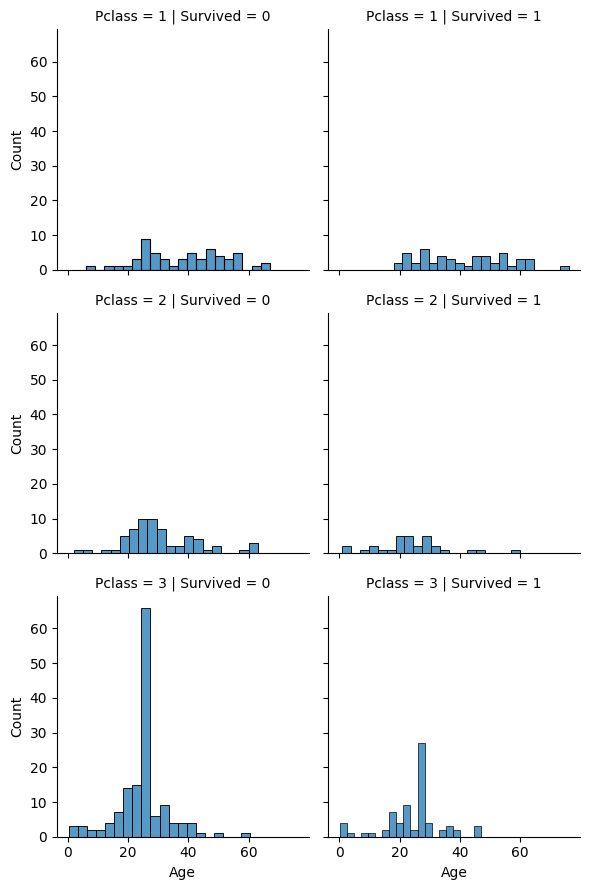

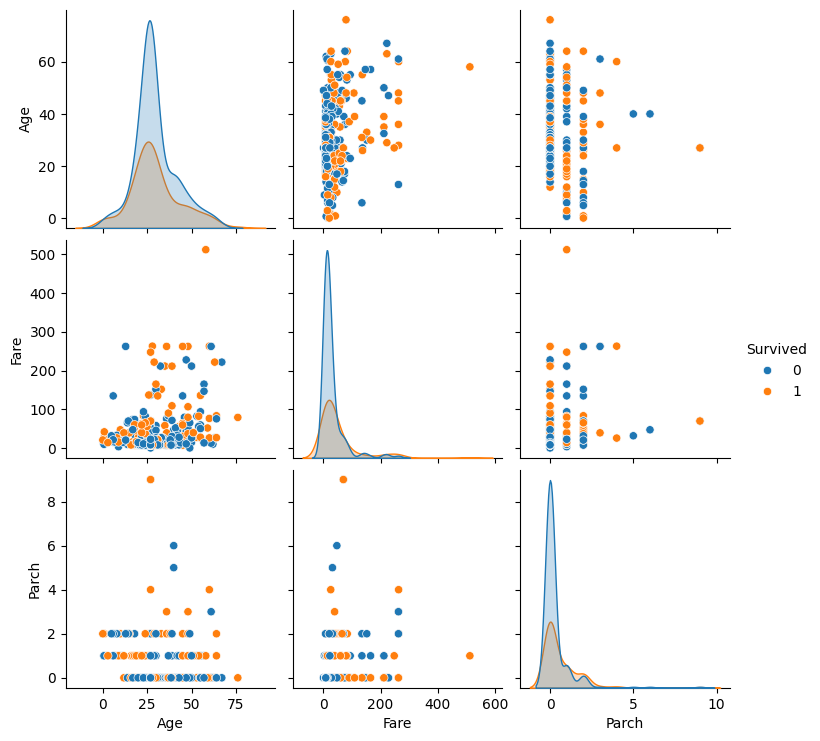

In [14]:
g = sns.FacetGrid(data, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)
plt.show()

sns.pairplot(data[['Age', 'Fare', 'Parch', 'Survived']], hue='Survived')
plt.show()

In [15]:
data.to_csv("tested_cleaned.csv", index=False)
print("Cleaned and analyzed dataset saved as tested_cleaned.csv")

Cleaned and analyzed dataset saved as tested_cleaned.csv
